In [1]:
import pymongo
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bson.code import Code

In [2]:
mongo_connection = pymongo.MongoClient("localhost", 27017)
documents = mongo_connection.tiger.documents
# Loading our whole database to a list
bundle_list = list(
    documents.aggregate([
            {"$match" : {"yandexTranslationBody" : {"$exists" : True}}}
        ],allowDiskUse=True)
)

In [3]:
# Let's get the string for our titles and texts
str_text = ""
str_title = ""
nb_containing_bag = 0
for doc in bundle_list:
    str_text += doc["yandexTranslationBody"]
    str_title += doc["yandexTranslationTitle"]

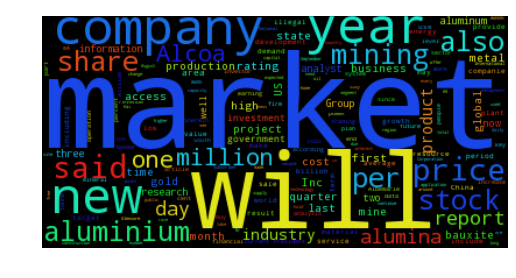

In [4]:
# Wordcloud for our documents

wordcloud = WordCloud().generate(str_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

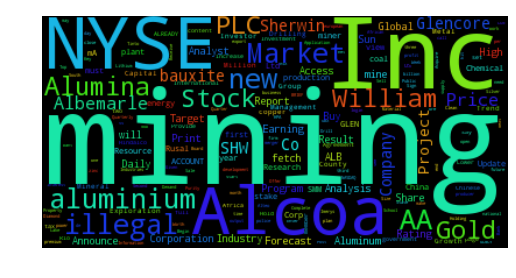

In [5]:
# Wordcloud for our titles
words = WordCloud().generate(str_title)
plt.imshow(words)
plt.axis("off")
plt.show()

In [6]:
# Printing the 20 most used words
map = Code(
"""
function() {  
    var summary = this.yandexTranslationBody;
    if (summary) { 
        // quick lowercase to normalize per your requirements
        summary = summary.toLowerCase().split(" "); 
        for (var i = summary.length - 1; i >= 0; i--) {
            // might want to remove punctuation, etc. here
            if (summary[i].length < 50)  {      // make sure there's something
               emit(summary[i], 1); // store a 1 for each word
            }
        }
    }
};
"""
)

reduce = Code(
"""
function( key, values ) {    
    var count = 0;    
    values.forEach(function(v) {            
        count +=v;    
    });
    return count;
}
"""
)

result = documents.map_reduce(map, reduce, "myresults")

In [10]:
# Getting the 100 most used words in our documents and their count
docfinal = list(result.find())
docsorted = sorted(docfinal, key=lambda x: x['value'], reverse=True)
print("We actually got {} documents with a Yandex Translation\n".format(len(bundle_list)))
print("\t\tKEY\t\tVALUE\t\tAVERAGE COUNT (WORDS/DOC)")
for words in docsorted[0:100]:
    if(len(words["_id"]) < 8):
        print("\t\t{}\t\t{}\t\t{}".format(words["_id"], int(words["value"]), words["value"]/len(bundle_list)))
    else:
        print("\t\t{}\t{}\t\t{}".format(words["_id"], int(words["value"]), words["value"]/len(bundle_list)))

We actually got 7545 documents with a Yandex Translation

		KEY		VALUE		AVERAGE COUNT (WORDS/DOC)
		the		264238		35.02160371106693
		of		139489		18.487607687210073
		and		115742		15.340225314778
		to		104487		13.848508946322067
		in		88922		11.785553346587143
		a		71650		9.49635520212061
		is		44470		5.893969516235918
		for		42251		5.599867461895295
		on		35738		4.736646785950961
		that		32908		4.36156394963552
		with		26232		3.4767395626242545
		by		24490		3.2458581842279655
		at		24232		3.211663353214049
		as		23642		3.1334658714380383
		from		20440		2.7090788601722995
		are		19181		2.542213386348575
		this		18357		2.4330019880715708
		has		17834		2.363684559310802
		be		16544		2.1927104042412195
		it		16142		2.139430086149768
		its		15146		2.0074221338634857
		will		14941		1.9802518223989396
		was		13980		1.8528827037773359
		have		13678		1.812856196156395
		an		12817		1.6987408880053014
		or		12321		1.6330019880715705
		not		11123		1.4742213386348575
		which		11097		1.4707753479125